### 欠損データへの対処

他のサンプルか特徴量で欠損値を保管する。<br>

### 表形式のデータで欠損値を特定

In [11]:
import pandas as pd
from io import StringIO


# サンプルデータを作成
csv_data = '''A, B, C, D
1.0, 2.0, 3.0, 4.0
5.0, 6.0,, 8.0
10.0, 11.0, 12.0,'''

In [12]:
df = pd.read_csv(StringIO(csv_data))

In [13]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [14]:
df.isnull().sum()

A     0
 B    0
 C    1
 D    1
dtype: int64

### 欠損値の補完

平均値補完。

In [15]:
from sklearn.preprocessing import Imputer
# 欠損値補完のインスタンスを作成(列)
imr = Imputer(missing_values='NaN', strategy='mean',axis=0)
# データを適合
imr = imr.fit(df.values)
# 補完を実行
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

### カテゴリデータの処理

数値データだけでなく、カテゴリ値の特徴量の対処について<br>

### 名義特徴量と順序特徴量

Tシャツの例<br>
順序特徴量 : XL > L > M<br>
名義特徴量 : 赤, 青, 黄<br>

### サンプルデータセットの作成

In [16]:
import pandas as pd
df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


### 順序特徴量のマッピング

In [17]:
size_mapping = {'XL':3, 'L':2, 'M':1}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


### クラスラベルのエンコーディング

In [24]:
from sklearn.preprocessing import LabelEncoder
# ラベルエンコーダのインスタンスを作成
class_le = LabelEncoder()
# クラスラベルから整数に変換
y = class_le.fit_transform(df['classlabel'].values)
y

array([1, 0, 1])

In [25]:
df['classlabel'] = y

In [26]:
df

,color,size,price,classlabel
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1


In [28]:
df['classlabel'] = class_le.inverse_transform(y)

/Users/Takanori/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [29]:
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


### ダミー特徴量の作成

In [33]:
# 大きさとして意味を持たない特徴量にone-hot-エンコーディングを実行
pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [35]:
# 多重共線性に注意して
pd.get_dummies(df[['price', 'color', 'size']], drop_first=True)

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


### データセットをトレーニングデータセットとテストデータセットに分割する。

In [38]:
import numpy as np

df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

# if the Wine dataset is temporarily unavailable from the
# UCI machine learning repository, un-comment the following line
# of code to load the dataset from a local path:

# df_wine = pd.read_csv('wine.data', header=None)


df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [39]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

### 特徴量の尺度を揃える

In [40]:
from sklearn.preprocessing import StandardScaler
# 標準化のインスタンスを作成
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

### L1正則付きロジスティック回帰

In [41]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty='l1')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=1.0)
# Note that C=1.0 is the default. You can increase
# or decrease it to make the regulariztion effect
# stronger or weaker, respectively.
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 1.0
Test accuracy: 1.0


In [43]:
# 切片の表示
lr.intercept_

array([-1.26323103, -1.21616004, -2.37193705])

In [44]:
# 重み係数の表示
lr.coef_

array([[ 1.2458601 ,  0.18084086,  0.74225128, -1.15993505,  0.        ,
         0.        ,  1.17691302,  0.        ,  0.        ,  0.        ,
         0.        ,  0.54101481,  2.51165494],
       [-1.53648495, -0.38726049, -0.99543095,  0.36525835, -0.05937955,
         0.        ,  0.6677794 ,  0.        ,  0.        , -1.93433767,
         1.23347657,  0.        , -2.23128786],
       [ 0.13560859,  0.169852  ,  0.3573964 ,  0.        ,  0.        ,
         0.        , -2.43511481,  0.        ,  0.        ,  1.56131736,
        -0.81679966, -0.49717936,  0.        ]])

### ランダムフォレストで特徴量の重要度にアクセス

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


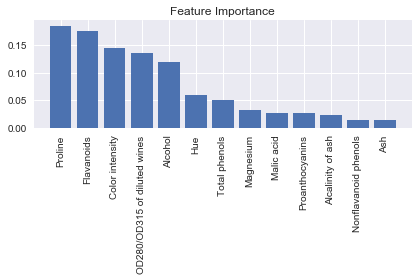

In [46]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('images/04_09.png', dpi=300)
plt.show()